In [3]:
# 1. Data Collection and Preprocessing
import pandas as pd

# URL for Titanic dataset CSV file
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'

# Load the dataset directly from the URL
df = pd.read_csv(url)

# Preview the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Pa

In [5]:
# Handling Missing Data
# In this dataset, we have some missing values (especially for Age). We will:

# Fill the missing Age values with the mean of the column.
# Fill the missing Embarked values with the mode of the column (most frequent value).
# Drop irrelevant columns like Name, Ticket, and Cabin.

# Fill missing values
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop irrelevant columns
df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Check for missing values after cleaning
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


C:\Users\swapn\AppData\Local\Temp\ipykernel_15232\942883458.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
C:\Users\swapn\AppData\Local\Temp\ipykernel_15232\942883458.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [7]:
# Encoding Categorical Features
# We need to convert categorical columns like Sex and Embarked into numeric format, as machine learning models only understand numeric data.

# Encoding 'Sex' column (Male=1, Female=0)
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

# Encoding 'Embarked' column (C=0, Q=1, S=2)
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Preview the cleaned dataset
print(df.head())


   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0            1         0       3    1  22.0      1      0   7.2500         2
1            2         1       1    0  38.0      1      0  71.2833         0
2            3         1       3    0  26.0      0      0   7.9250         2
3            4         1       1    0  35.0      1      0  53.1000         2
4            5         0       3    1  35.0      0      0   8.0500         2


In [9]:
"""
2. Exploratory Data Analysis (EDA)
Before building the model, let's perform some basic visualizations to understand the relationships between features.
"""

"\n2. Exploratory Data Analysis (EDA)\nBefore building the model, let's perform some basic visualizations to understand the relationships between features.\n"

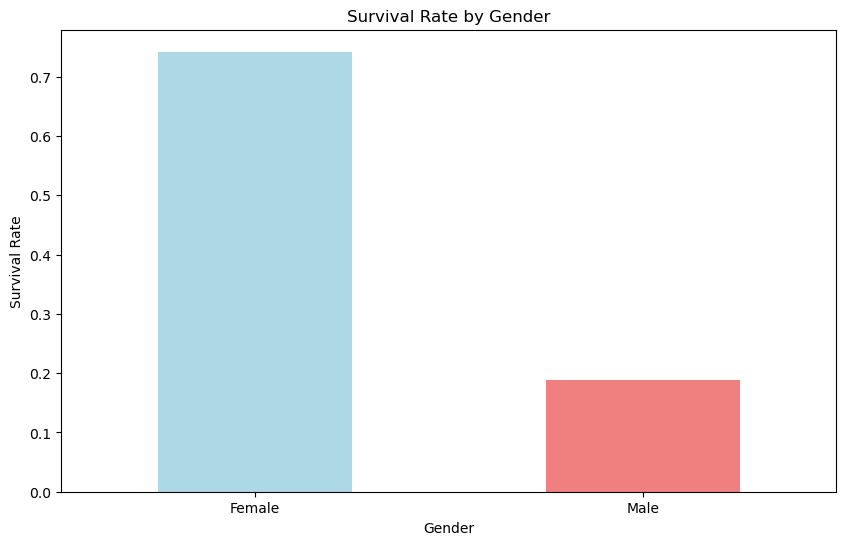

In [11]:
# a. Survival Rate by Gender

import matplotlib.pyplot as plt

# Survival rate by gender
gender_survival = df.groupby('Sex')['Survived'].mean()

gender_survival.plot(kind='bar', color=['lightblue', 'lightcoral'], figsize=(10, 6))
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.xticks([0, 1], ['Female', 'Male'], rotation=0)
plt.show()

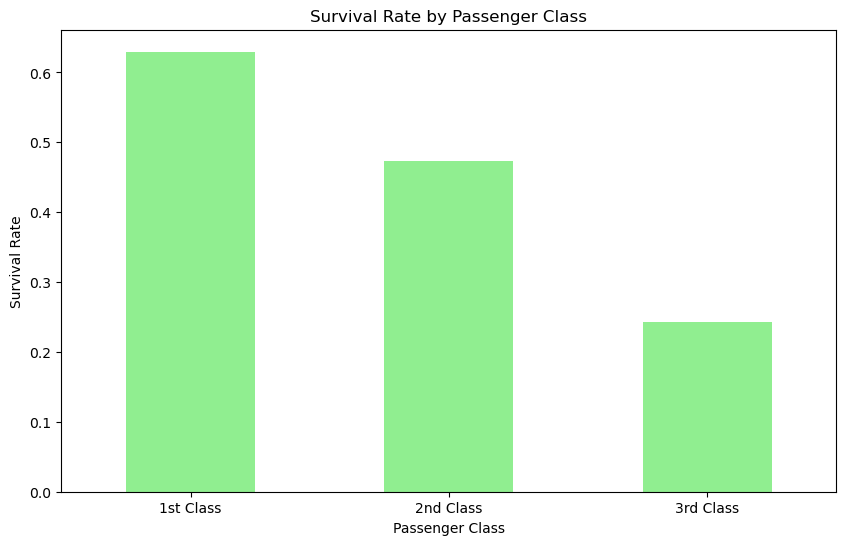

In [13]:
# b. Survival Rate by Class

# Survival rate by passenger class
class_survival = df.groupby('Pclass')['Survived'].mean()

class_survival.plot(kind='bar', color='lightgreen', figsize=(10, 6))
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.xticks([0, 1, 2], ['1st Class', '2nd Class', '3rd Class'], rotation=0)
plt.show()

In [15]:
"""
3. Feature Selection and Data Split
Next, we will select relevant features (Pclass, Sex, Age, SibSp, Parch, Fare, Embarked) and split the data into training and testing sets.
"""

'\n3. Feature Selection and Data Split\nNext, we will select relevant features (Pclass, Sex, Age, SibSp, Parch, Fare, Embarked) and split the data into training and testing sets.\n'

In [17]:
from sklearn.model_selection import train_test_split

# Selecting relevant features
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df['Survived']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)

(712, 7) (179, 7)


In [19]:
"""
4. Building a Machine Learning Model
Now, we'll train a Logistic Regression model on the training data to predict the survival probability.
"""

"\n4. Building a Machine Learning Model\nNow, we'll train a Logistic Regression model on the training data to predict the survival probability.\n"

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the logistic regression model
model = LogisticRegression(max_iter=200)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 81.01%
Confusion Matrix:
[[90 15]
 [19 55]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [23]:
# """
# 5. Model Evaluation
# After training the model, we evaluate its performance using metrics like accuracy, confusion matrix, and classification report. These metrics will help us understand how well the model is performing.

# Accuracy: The percentage of correctly predicted instances.
# Confusion Matrix: Provides a detailed summary of predictions compared to the actual values.
# Classification Report: Includes precision, recall, F1-score, and support for each class (Survived/Not Survived).
# """